# Challenge 2 – Regulation, TFP, and Employment

Team JobInsights (Michael Nair & Soumit S Rahman) is investigating how the quality of regulations—both on the books and in day-to-day firm experiences—shapes total factor productivity (TFP), formalization, and job creation. This notebook serves as the analytical companion to our NextJs application described in `project.md`, grounding the story in transparent, reproducible code.


In [16]:
from pathlib import Path

import numpy as np
import pandas as pd
import plotly.express as px
from IPython.display import Image, IFrame, Markdown, display


In [ ]:
# Load cleaned data

print()
Pillar_path = 'DataDive25/Team_Projects/challenge_2/cleaned_data/Merged_TFP_and_BReady_2024.csv'
print(f"path to Merged_TFP_and_BReady_2024.csv: {Pillar_path}")
tfp_pillar_df = pd.read_csv(Pillar_path)


TopicScores_path = 'DataDive25/Team_Projects/challenge_2/cleaned_data/Merged_TFP_and_TopicScores_2024.csv'
print(f"path to Merged_TFP_and_TopicScores_2024.csv: {TopicScores_path}")
tfp_topic_scores_df = pd.read_csv(TopicScores_path)



path to Merged_TFP_and_BReady_2024.csv: /Users/michaelnair/Desktop/world-bank-hackathon/DataDive25/Team_Projects/challenge_2/cleaned_data/Merged_TFP_and_BReady_2024.csv
path to Merged_TFP_and_TopicScores_2024.csv: /Users/michaelnair/Desktop/world-bank-hackathon/DataDive25/Team_Projects/challenge_2/cleaned_data/Merged_TFP_and_TopicScores_2024.csv


In [ ]:
# scatter plot comparing the 3 pillar types

pillar_fig = px.scatter_3d(
    tfp_pillar_df,
    x="Pillar_3_Operational_Efficiency",
    y="Pillar_2_Public_Services",
    z="Pillar_1_Regulatory_Framework",
    color="tfp_avg",
    color_continuous_scale="Viridis",
    hover_name="country_official",
    hover_data={
        "Pillar_3_Operational_Efficiency": True,
        "Pillar_2_Public_Services": True,
        "Pillar_1_Regulatory_Framework": True,
        "tfp_avg": ":.3f",
        "max_year": True,
    },
    title="TFP and B-Ready Pillars (3D view)",
)

pillar_fig.update_layout(
    scene=dict(
        xaxis_title="Operational Efficiency",
        yaxis_title="Public Services",
        zaxis_title="Regulatory Framework",
    ),
    coloraxis_colorbar=dict(title="Average TFP"),
)

output_dir = Path.cwd() / "DataDive25/Team_Projects/challenge_2/outputs"
output_dir.mkdir(parents=True, exist_ok=True)
html_path = output_dir / "pillar_regulation_tfp_scatter_3d.html"
pillar_fig.write_html(html_path, include_plotlyjs="cdn")
pillar_fig.show()


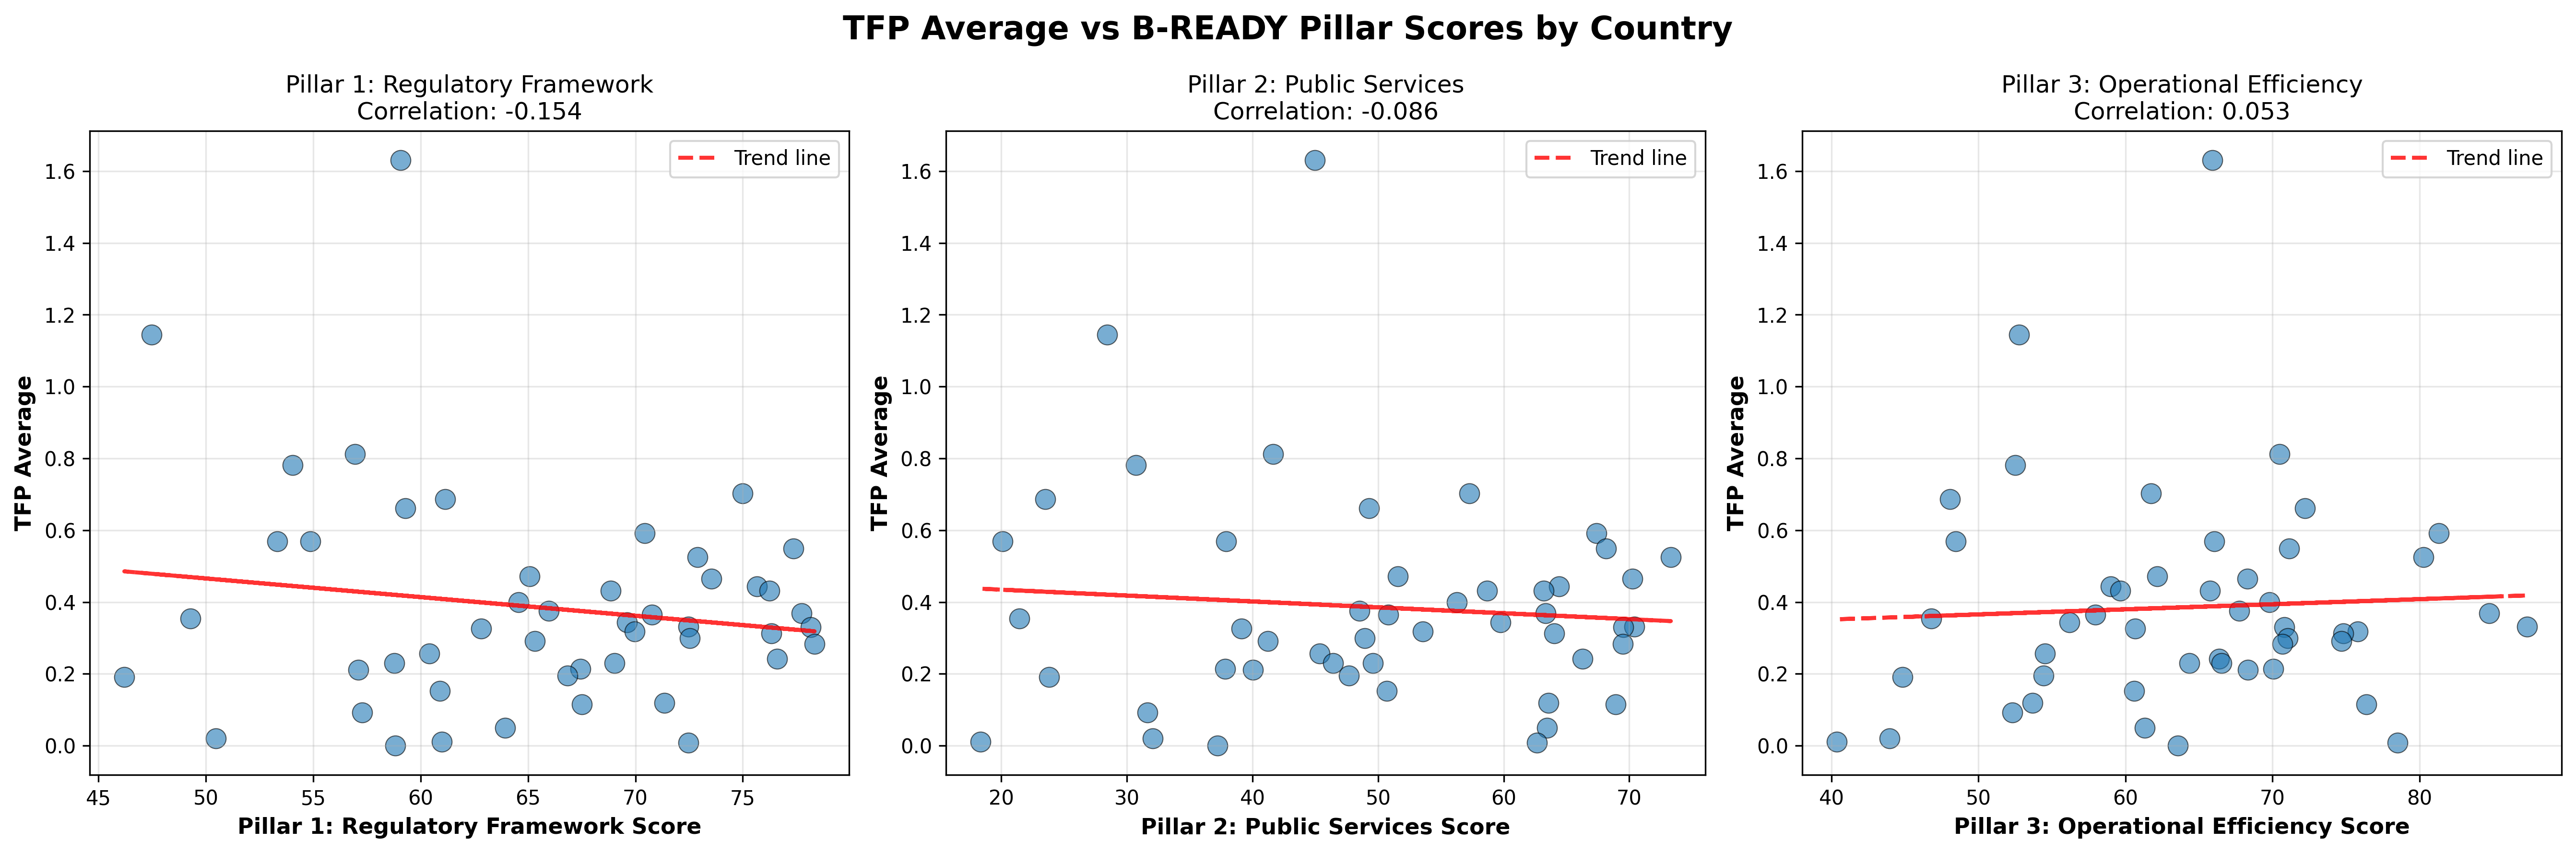

**What this shows:** Each dot is a country plotted across the three B-Ready pillar scores, with color representing average TFP. Clusters highlight which regulatory pillar is most binding relative to peers.

In [11]:
# Figure 1 – TFP vs. B-Ready pillars
pillars_img = Path(
    "/Users/michaelnair/Desktop/world-bank-hackathon/DataDive25/Team_Projects/challenge_2/images/TFP_vs_Pillars_Plot.png"
)

if pillars_img.exists():
    display(Image(filename=str(pillars_img), embed=True))
    display(
        Markdown(
            "**What this shows:** Each dot is a country plotted across the three B-Ready pillar scores, with color representing average TFP. Clusters highlight which regulatory pillar is most binding relative to peers."
        )
    )
else:
    print(f"Missing image: {pillars_img}")


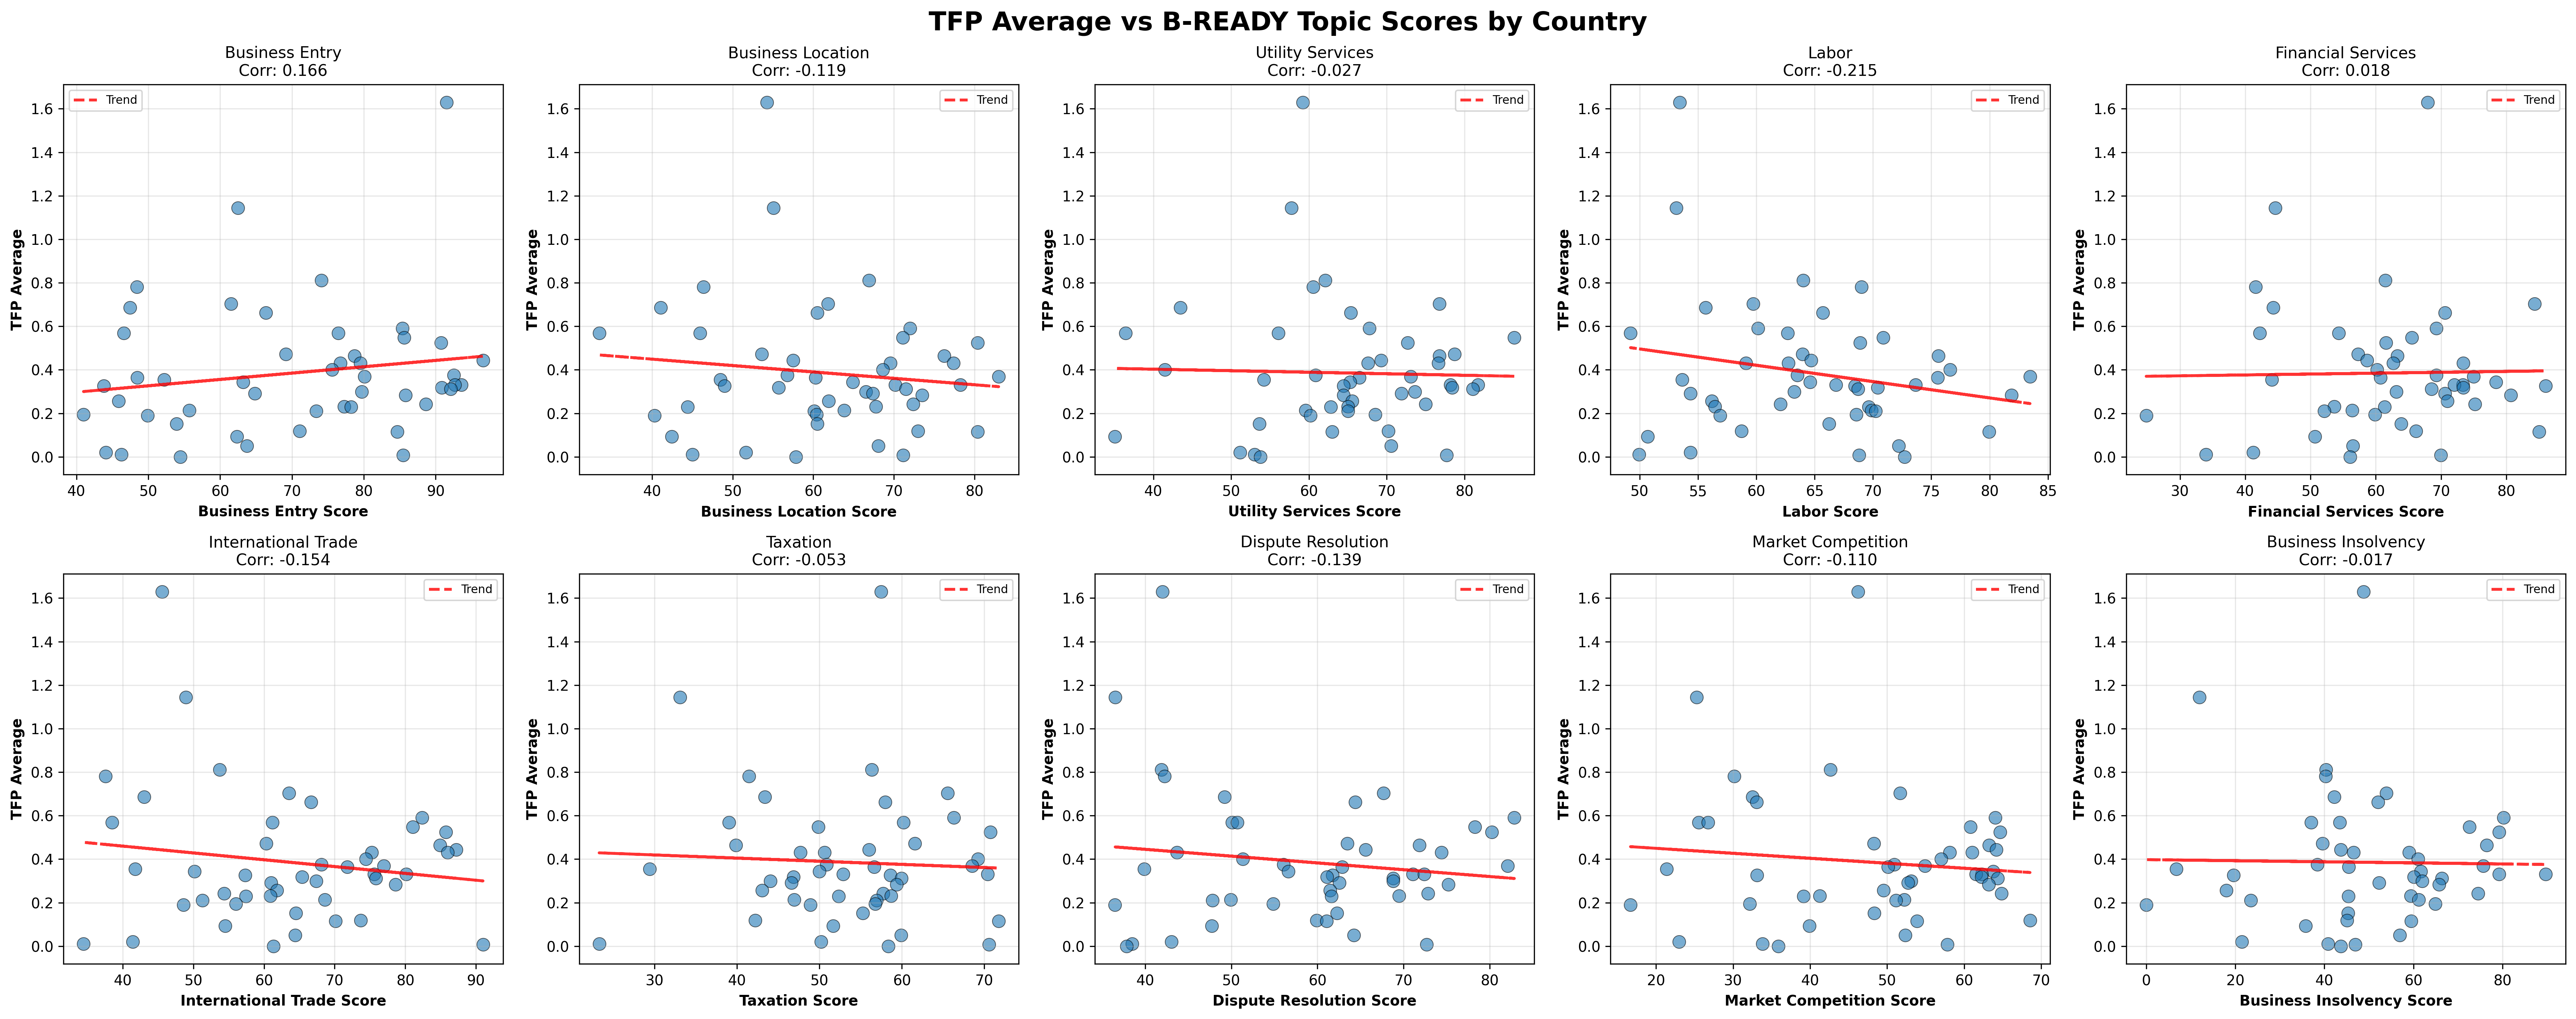

**What this shows:** Topic scores unpack the pillars into specific regulatory frictions (permits, electricity, tax morale, skills). The overlay with TFP surfaces which bottlenecks line up with lagging productivity.

In [ ]:
# Figure 2 – TFP vs. topic clusters
topics_img = Path(
    "/Users/michaelnair/Desktop/world-bank-hackathon/DataDive25/Team_Projects/challenge_2/images/TFP_vs_Topics_Plot.png"
)

if topics_img.exists():
    display(Image(filename=str(topics_img), embed=True))
    display(
        Markdown(
            "**What this shows:** Topic scores unpack the pillars into specific regulatory frictions (permits, electricity, tax morale, skills). The overlay with TFP surfaces which bottlenecks line up with lagging productivity."
        )
    )
else:
    print(f"Missing image: {topics_img}")



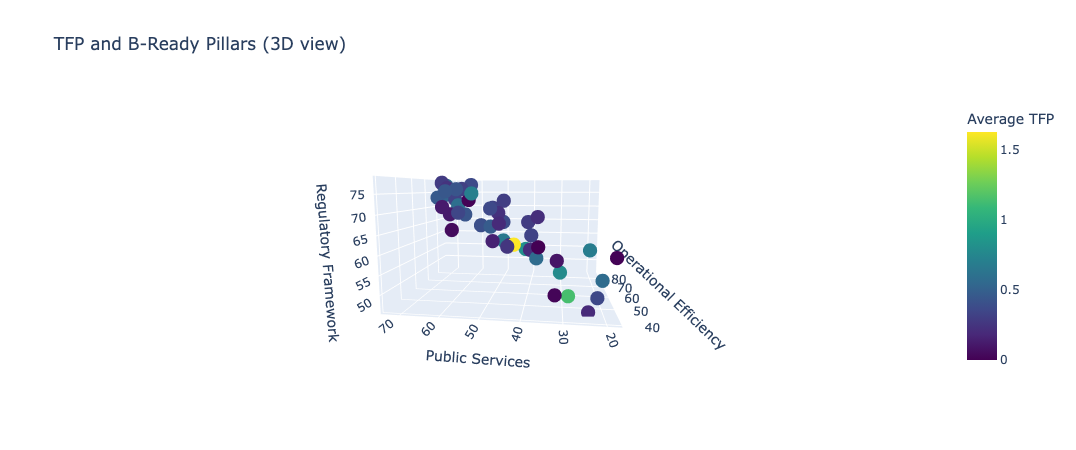

**What this shows:** Topic scores unpack the pillars into specific regulatory frictions (permits, electricity, tax morale, skills). The overlay with TFP surfaces which bottlenecks line up with lagging productivity.

In [20]:
# Figure 2 – scatter plot comparing the 3 pillar types
topics_img = Path(
    "/Users/michaelnair/Desktop/world-bank-hackathon/DataDive25/Team_Projects/challenge_2/images/TFP and B-Ready Pillars.png"
)

if topics_img.exists():
    display(Image(filename=str(topics_img), embed=True))
    display(
        Markdown(
            "**What this shows:** Topic scores unpack the pillars into specific regulatory frictions (permits, electricity, tax morale, skills). The overlay with TFP surfaces which bottlenecks line up with lagging productivity."
        )
    )
else:
    print(f"Missing image: {topics_img}")

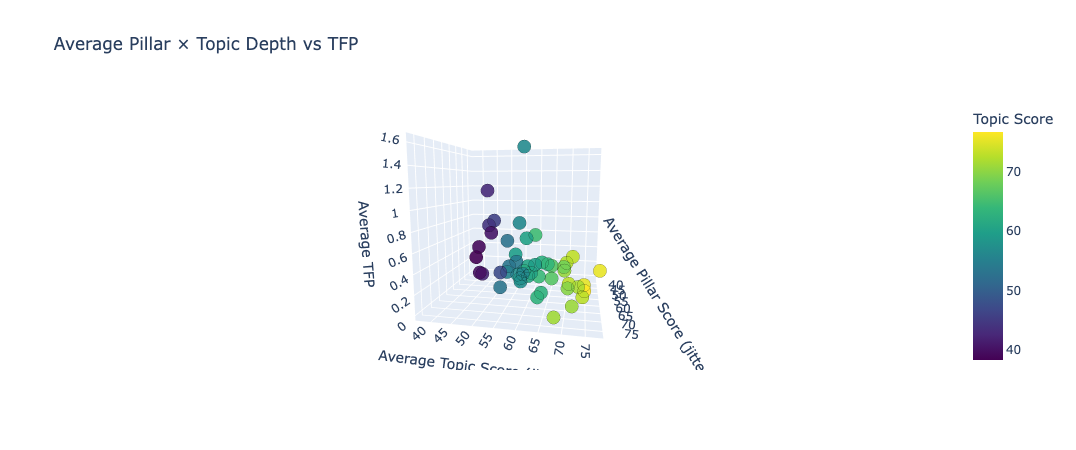

**What this shows:** Topic scores unpack the pillars into specific regulatory frictions (permits, electricity, tax morale, skills). The overlay with TFP surfaces which bottlenecks line up with lagging productivity.

In [21]:
# Figure 4 – 3d plot comparing pillar and topic to TFP
topics_img = Path(
    "/Users/michaelnair/Desktop/world-bank-hackathon/DataDive25/Team_Projects/challenge_2/images/topic and pillar vs TFP.png"
)

if topics_img.exists():
    display(Image(filename=str(topics_img), embed=True))
    display(
        Markdown(
            "**What this shows:** Topic scores unpack the pillars into specific regulatory frictions (permits, electricity, tax morale, skills). The overlay with TFP surfaces which bottlenecks line up with lagging productivity."
        )
    )
else:
    print(f"Missing image: {topics_img}")

In [19]:
# 3d plot comparing pillar and topic to TFP

# Merge pillar and topic datasets on country_official
merged_df = tfp_pillar_df.merge(
    tfp_topic_scores_df,
    on="country_official",
    how="inner",
    suffixes=("_pillar", "_topic"),
)

print(f"Merged rows: {merged_df.shape[0]} | Columns: {merged_df.shape[1]}")
merged_df.head(10)

# create 3d plot
pillar_cols = [
    "Pillar_1_Regulatory_Framework",
    "Pillar_2_Public_Services",
    "Pillar_3_Operational_Efficiency",
]
topic_cols = [
    "Business_Entry_Overall",
    "Business_Location_Overall",
    "Utility_Services_Overall",
    "Labor_Overall",
    "Financial_Services_Overall",
    "International_Trade_Overall",
    "Taxation_Overall",
    "Dispute_Resolution_Overall",
    "Market_Competition_Overall",
    "Business_Insolvency_Overall",
]
merged_df["pillar_score_mean"] = merged_df[pillar_cols].mean(axis=1)
merged_df["topic_score_mean"] = merged_df[topic_cols].mean(axis=1)

rng = np.random.default_rng(42)
jitter_scale = 2
merged_df["pillar_score_plot"] = (
    merged_df["pillar_score_mean"]
    + rng.normal(0, jitter_scale, size=len(merged_df))
).clip(lower=0, upper=100)
merged_df["topic_score_plot"] = (
    merged_df["topic_score_mean"]
    + rng.normal(0, jitter_scale, size=len(merged_df))
).clip(lower=0, upper=100)

pillar_topic_fig = px.scatter_3d(
    merged_df,
    x="pillar_score_plot",
    y="topic_score_plot",
    z="tfp_avg_pillar",
    color="topic_score_mean",
    color_continuous_scale="Viridis",
    hover_name="country_official",
    hover_data={
        "pillar_score_mean": ":.2f",
        "topic_score_mean": ":.2f",
        "tfp_avg_pillar": ":.3f",
        "Pillar_1_Regulatory_Framework": True,
        "Business_Entry_Overall": True,
    },
    title="Average Pillar × Topic Depth vs TFP",
)

pillar_topic_fig.update_traces(
    marker=dict(size=7.5, opacity=0.9, line=dict(width=0.4, color="rgba(0,0,0,0.4)"))
)

pillar_topic_fig.update_layout(
    scene=dict(
        xaxis_title="Average Pillar Score (jittered)",
        yaxis_title="Average Topic Score (jittered)",
        zaxis_title="Average TFP",
    ),
    coloraxis_colorbar=dict(title="Topic Score"),
)

topic_html = output_dir / "pillar_topic_tfp_scatter_3d.html"
pillar_topic_fig.write_html(topic_html, include_plotlyjs="cdn")
pillar_topic_fig.show()


Merged rows: 48 | Columns: 24


# spreadsheet with additional analysis
https://docs.google.com/spreadsheets/d/15mnv-AkGdBbtIghMVxjmkGHmRfhNcpiM-mQ0C-3Ypdc/edit?pli=1&gid=576923710#gid=576923710